In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import altair as alt


%matplotlib inline

In [2]:
data_1 = pd.read_csv('data/data_1.csv', header=None, index_col=None)
data_2 = pd.read_csv('data/data_2.csv', header=None, index_col=None)
data_3 = pd.read_csv('data/data_3.csv', header=None, index_col=None)
data_4 = pd.read_csv('data/data_4.csv', header=None, index_col=None)
data_5 = pd.read_csv('data/data_5.csv', header=None, index_col=None)

In [3]:
data_frame1 = np.array(data_1[list(range(2,np.shape(data_1)[1]))])
data_frame2 = np.array(data_2[list(range(2,np.shape(data_2)[1]))])
data_frame3 = np.array(data_3[list(range(2,np.shape(data_3)[1]))])
data_frame4 = np.array(data_4[list(range(2,np.shape(data_4)[1]))])
data_frame5 = np.array(data_5[list(range(2,np.shape(data_5)[1]))])

In [4]:
error_list1 = list(data_1[0])
error_list2 = list(data_2[0])
error_list3 = list(data_3[0])
error_list4 = list(data_4[0])
error_list5 = list(data_5[0])

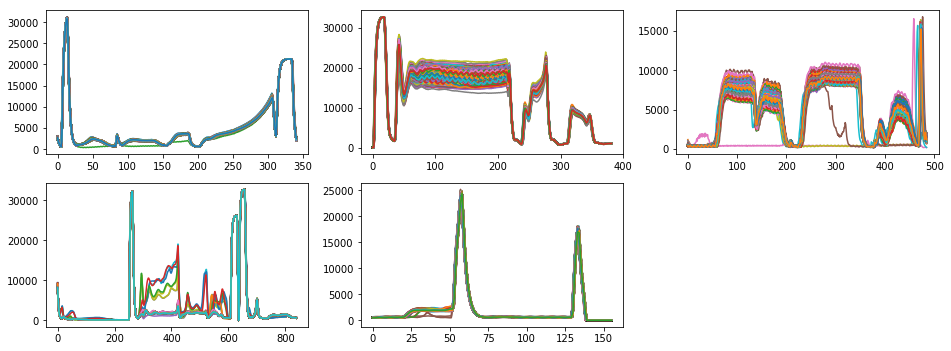

In [5]:
plt.figure(figsize=(16,9))

plt.subplot(331)
for i in range(len(data_frame1)):
    plt.plot(data_frame1[i])
    
plt.subplot(332)
for i in range(len(data_frame2)):
    plt.plot(data_frame2[i])
    
plt.subplot(333)
for i in range(len(data_frame3)):
    plt.plot(data_frame3[i])
    
plt.subplot(334)
for i in range(len(data_frame4)):
    plt.plot(data_frame4[i])
    
plt.subplot(335)
for i in range(len(data_frame5)):
    plt.plot(data_frame5[i])

/Users/minjung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


error index :  375
error index :  765
error index :  805


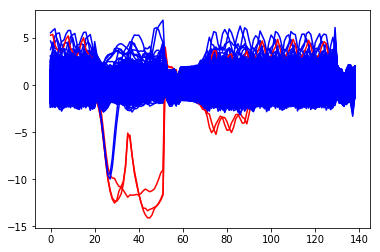

In [15]:
trans=np.transpose(data_frame5)
average=[]
std=[]

for i in trans:
    average.append(-np.average(i))
    std.append(1/np.std(i))

sample=[]
for i in range(len(trans)):
    sample.append(np.inner((np.add(trans[i],average[i])),std[i]))
    

data_std=np.transpose(sample)

for i in range(len(data_std)):
    if error_list5[i] == 0:
        plt.plot(data_std[i],"b")
    else:
        plt.plot(data_std[i],"r")
        print("error index : ", i)

In [23]:
tsne_data = data_frame3
tsne_label = error_list3


tsne_result = TSNE(n_components=2, learning_rate=300, init='pca').fit_transform(tsne_data)
df_tsne_result = (pd.DataFrame(tsne_result, columns=['V1', 'V2']).assign(error = tsne_label))

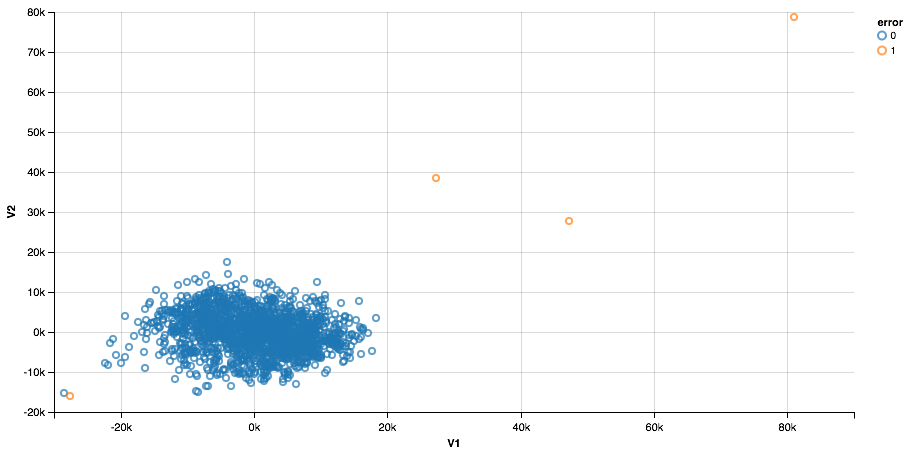

In [24]:
(df_tsne_result
  .pipe(alt.Chart, width=800, height=400)
  .mark_point()
  .encode(x='V1:Q', y='V2:Q', color='error:N')
)

-------------------------

error index :  382


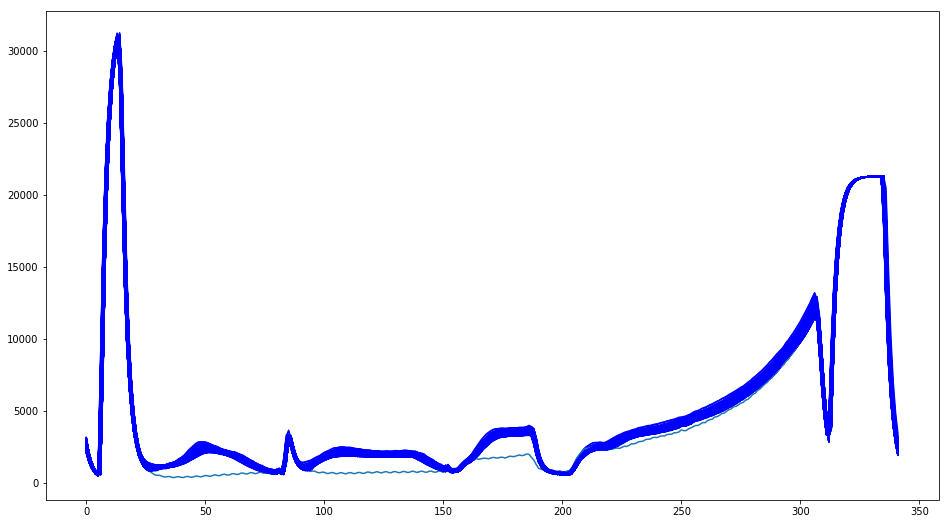

In [6]:
plt.figure(figsize=(16,9))

for i in range(len(data_frame1)):
    if error_list1[i] == 0:
        plt.plot(data_frame1[i],"b")
    else:
        plt.plot(data_frame1[i])
        print("error index : ", i)



error index :  258
error index :  667


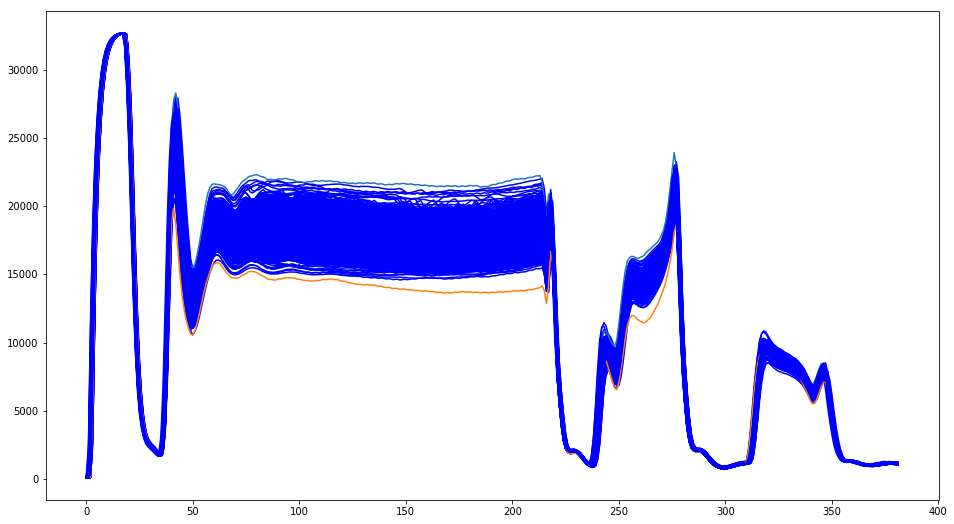

In [7]:
plt.figure(figsize=(16,9))

for i in range(len(data_frame2)):
    if error_list2[i] == 0:
        plt.plot(data_frame2[i],"b")
    else:
        plt.plot(data_frame2[i])
        print("error index : ", i)

error index :  66
error index :  706
error index :  1408
error index :  1425


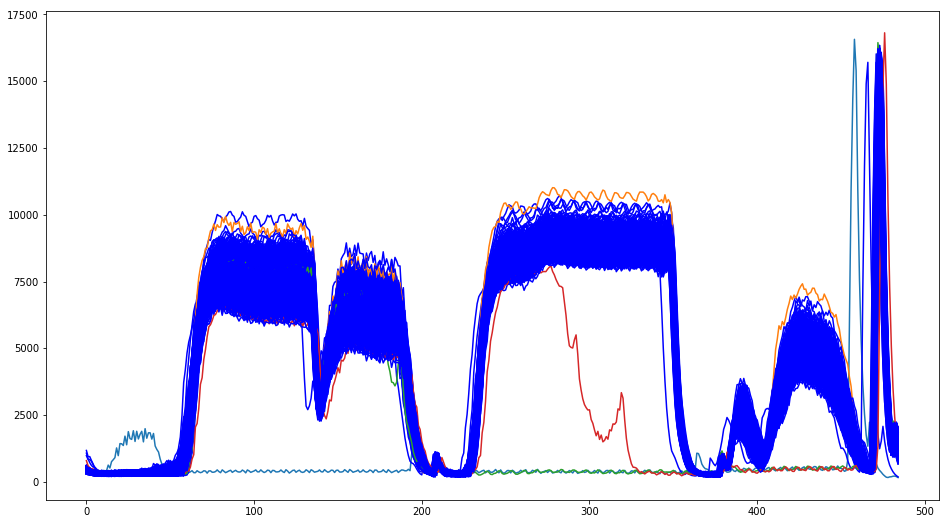

In [8]:
plt.figure(figsize=(16,9))

for i in range(len(data_frame3)):
    if error_list3[i] == 0:
        plt.plot(data_frame3[i],"b")
    else:
        plt.plot(data_frame3[i])
        print("error index : ", i)

error index :  690
error index :  693
error index :  694
error index :  757
error index :  758
error index :  778
error index :  779
error index :  780
error index :  892
error index :  893


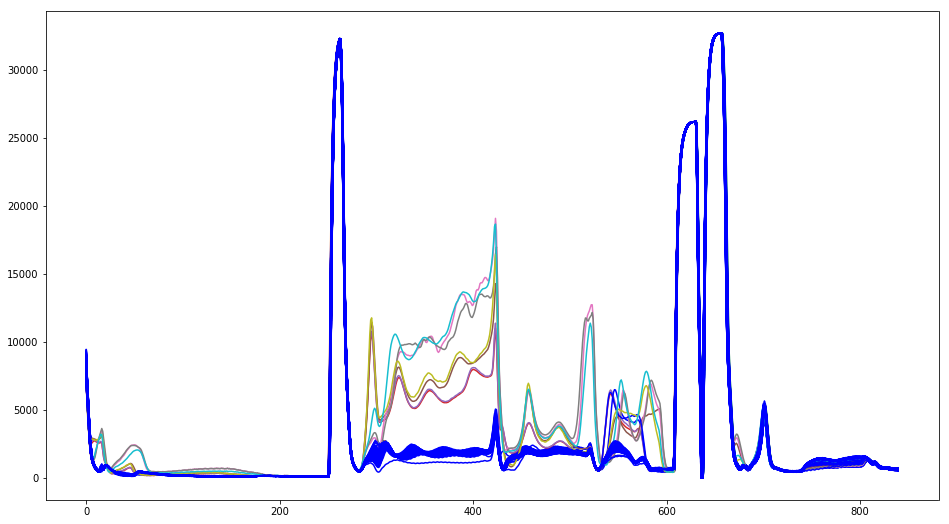

In [9]:
plt.figure(figsize=(16,9))

for i in range(len(data_frame4)):
    if error_list4[i] == 0:
        plt.plot(data_frame4[i],"b")
    else:
        plt.plot(data_frame4[i])
        print("error index : ", i)

error index :  375
error index :  765
error index :  805


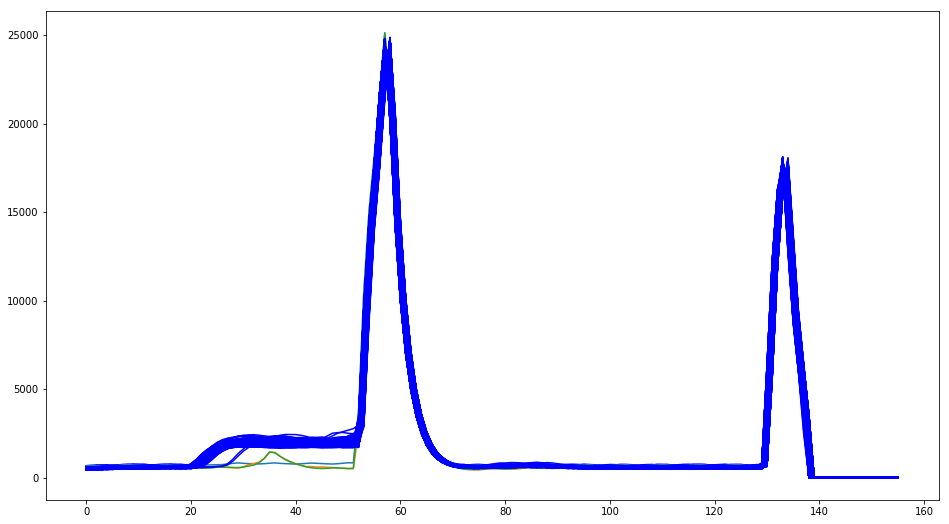

In [10]:
plt.figure(figsize=(16,9))

for i in range(len(data_frame5)):
    if error_list5[i] == 0:
        plt.plot(data_frame5[i],"b")
    else:
        plt.plot(data_frame5[i])
        print("error index : ", i)

-----------------------------

In [11]:
feature = np.mean(np.diff(data_frame2, axis=0), axis=1)
#feature2 = np.mean(data_frame1, axis=1)

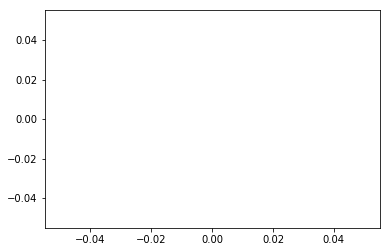

In [12]:
plt.plot(feature, ".")

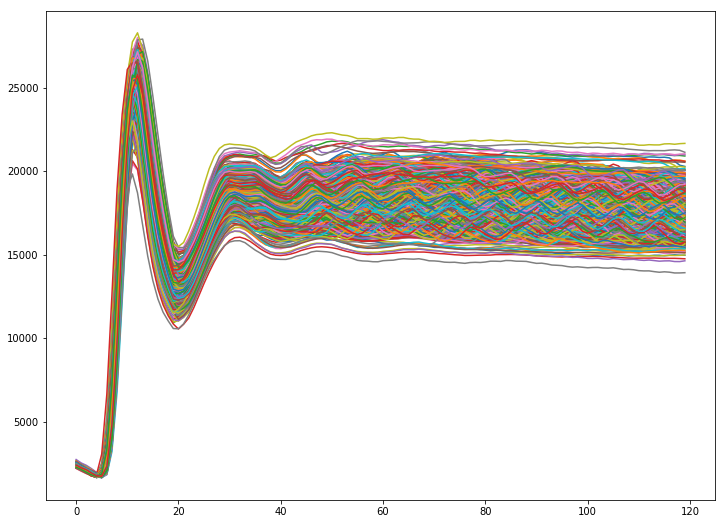

In [13]:
plt.figure(figsize=(12,9))
for i in range(len(data_frame2)):
    plt.plot(data_frame2[i][30:150])

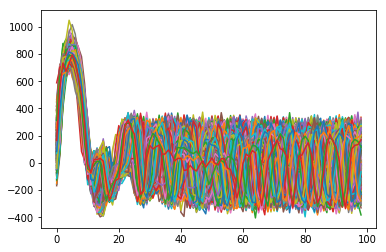

In [14]:
for i in range(len(data_frame2)):
    plt.plot(np.diff(data_frame2[i][50:150], axis=0))

# 문제
- 여러공정에 적용 할 수 있는 자동불량 검출 알고리즘 찾기
- 정상과 불량을 명확히 구분할 수 있는 데이터의 feature 찾기
- abnormaly detection 알고리즘 검색
- 머신러닝이나 딥러닝 적용 가능?
- 만능인 feature가 존재?
- 지도학습으로? 비지도학습으로?

- 베이즈 정리 및 기타 통계적 접근
- 다중 회귀분석
- derivative